<a href="https://colab.research.google.com/github/stephintoto/ICT-ASSIGNMENTS/blob/main/churnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
data = pd.read_csv('/content/churn-data-v2.csv')

In [3]:
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,530.0,two,157.0,3+,no,yes,no,sales,low
1,0.80,860.0,five,262.0,6+,no,yes,no,sales,medium
2,0.11,880.0,seven,272.0,4+,no,yes,no,sales,medium
3,0.72,870.0,five,223.0,5+,no,yes,no,sales,low
4,0.37,520.0,two,159.0,3+,no,yes,no,sales,low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14990 non-null  float64
 1   evaluation            14936 non-null  float64
 2   number_of_projects    14955 non-null  object 
 3   average_montly_hours  14973 non-null  float64
 4   time_spend_company    14999 non-null  object 
 5   work_accident         14999 non-null  object 
 6   churn                 14999 non-null  object 
 7   promotion             14999 non-null  object 
 8   department            14958 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.1+ MB


In [5]:
data.isnull().sum()

,0
satisfaction,9
evaluation,63
number_of_projects,44
average_montly_hours,26
time_spend_company,0
work_accident,0
churn,0
promotion,0
department,41
salary,0


In [6]:
null_columns = data.columns[data.isnull().any()]

In [7]:
null_columns

Index(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'department'],
      dtype='object')

In [8]:
from sklearn.impute import SimpleImputer
import numpy as np
numeric_columns = data[null_columns].select_dtypes(include=np.number).columns
non_numeric_columns = data[null_columns].select_dtypes(exclude=np.number).columns
numeric_imputer = SimpleImputer(strategy='median')
non_numeric_imputer = SimpleImputer(strategy='most_frequent')
data[numeric_columns] = numeric_imputer.fit_transform(data[numeric_columns])
data[non_numeric_columns] = non_numeric_imputer.fit_transform(data[non_numeric_columns])

In [9]:
data.isna().sum()

,0
satisfaction,0
evaluation,0
number_of_projects,0
average_montly_hours,0
time_spend_company,0
work_accident,0
churn,0
promotion,0
department,0
salary,0


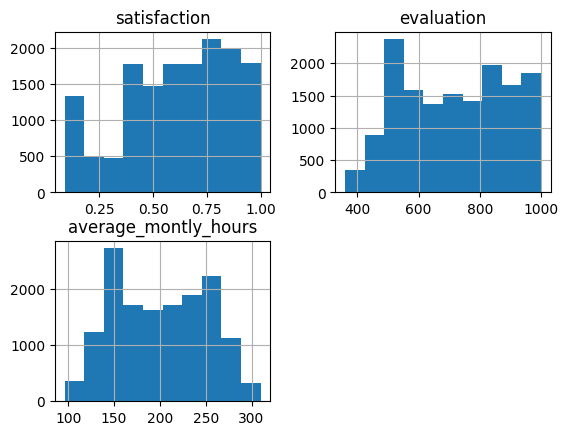

In [10]:
import matplotlib.pyplot as plt
freqplot = data.select_dtypes(include=['float'])
freqplot.hist()
plt.show()

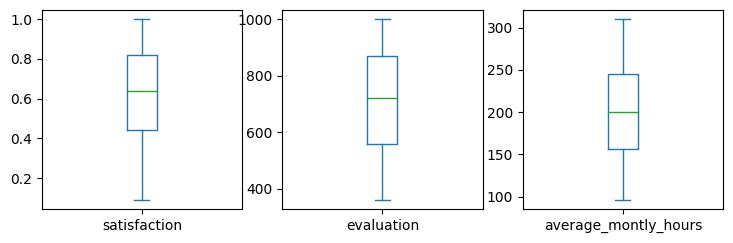

In [11]:
import matplotlib.pyplot as plt
data.plot(kind='box', subplots=True, layout=(5,5), figsize=(15,15))
plt.show()


In [12]:
outlier_col=[]
for column in data.select_dtypes(include=['number']):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    print(f"Number of outliers in {column}: {len(outliers)}")
    count=outliers.shape[0]

    if count>0:
        outlier_col.append(column)
print(outlier_col)

Number of outliers in satisfaction: 0
Number of outliers in evaluation: 0
Number of outliers in average_montly_hours: 0
[]


In [13]:
data1 =data.copy()
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,530.0,two,157.0,3+,no,yes,no,sales,low
1,0.80,860.0,five,262.0,6+,no,yes,no,sales,medium
2,0.11,880.0,seven,272.0,4+,no,yes,no,sales,medium
3,0.72,870.0,five,223.0,5+,no,yes,no,sales,low
4,0.37,520.0,two,159.0,3+,no,yes,no,sales,low


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['salary_encoded'] = le.fit_transform(data['salary'])
print(data)

       satisfaction  evaluation number_of_projects  average_montly_hours  \
0              0.38       530.0                two                 157.0   
1              0.80       860.0               five                 262.0   
2              0.11       880.0              seven                 272.0   
3              0.72       870.0               five                 223.0   
4              0.37       520.0                two                 159.0   
...             ...         ...                ...                   ...   
14994          0.40       570.0                two                 151.0   
14995          0.37       480.0                two                 160.0   
14996          0.37       530.0                two                 143.0   
14997          0.11       960.0                six                 280.0   
14998          0.37       520.0                two                 158.0   

      time_spend_company work_accident churn promotion department  salary  \
0         